# 베이지안 모수 추정의 예

베이지안 모수 추정(Bayesian parameter estimation) 방법은 모수의 값에 해당하는 특정한 하나의 숫자를 계산하는 것이 아니라 모수의 값이 가질 수 있는 모든 가능성, 즉 모수의 분포를 계산하는 작업이다.

이때 계산된 모수의 분포를 표현 방법은 두 가지가 있다.

1. 비모수적(non-parametric) 방법
 * 샘플을 제시한 후 히스토그램와 같은 방법으로 임의의 분포를 표현한다. MCMC(Markov chain Monte Carlo)와 같은 몬테카를로 방법에서 사용한다.
 
2. 모수적(parametric) 방법 
  * 모수의 분포를 잘 알려진 확률 분포 모형을 사용하여 나타낸다. 이렇게 하면 모수를 나타내는 확률 분포 수식이 다시 모수(parameter)를 가지게 되는데 이를 hyper-parameter라고도 부른다. 모수적 방법은 결국 hypter-parameter의 값을 숫자로 계산하는 작업이 된다.

여기에서는 모수적 방법의 몇 가지 간단한 예를 보인다.

## 베이지안 모수 추정의 기본 원리

베이지안 모수 추정 방법은 다음 공식을 사용하여 모수의 분포 $p(\theta)$를 $p(\theta \mid x_{1},\ldots,x_{N})$ 로 갱신(update)하는 작업이다.


$$ p(\theta \mid x_{1},\ldots,x_{N}) = \dfrac{p(x_{1},\ldots,x_{N} \mid \theta) \cdot p(\theta)}{p(x_{1},\ldots,x_{N})} \propto p(x_{1},\ldots,x_{N}  \mid \theta )  \cdot p(\theta) $$ 


이 식에서 

$p(\theta)$ 는 사전(Prior) 분포라고 한다. 사전 분포는 베이지안 추정 작업을 하기 전에 이미 알고 있던 모수 $\theta$의 분포를 뜻한다. 
아무런 지식이 없는 경우에는 보통 uniform 분포 $\text{Beta}(1,1)$나 0 을 중심으로하는 정규 분포 $\mathcal{N}(0, 1)$를 사용한다


$p(\theta \mid x_{1},\ldots,x_{N})$ 는 사후(Posterior) 분포라고 한다. 수학적으로는 데이터 $x_{1},\ldots,x_{N}$가 알려진 상태에서의 $\theta$에 대한 조건부 확률 분포이다. 우리가 베이지안 모수 추정 작업을 통해 구하고자 하는 것이 바로 이 사후 분포이다. 
 
 
$p(x_{1},\ldots,x_{N} \mid \theta)$  분포는 우도(Likelihood) 분포라고 한다. 현재 우리가 알고 있는 값은 데이터  $x_{1},\ldots,x_{N}$ 이고 $\theta$가 미지수이다. 이와 반대로 $theta$를 알고 있는 상태에서의 데이터  $x_{1},\ldots,x_{N}$ 가 나올 조건부 확률 분포를 우도라고 한다. 


## 베르누이 분포의 모수 추정

가장 단순한 이산 확률 분포인 베르누이 분포의 모수 $\theta$를 베이지안 추정법으로 추정해 본다.

베르누이 분포의 모수는 0부터 1사이의 값을 가지므로 사전 분포는 하이퍼 모수 $a=b=1$인 베타 분포로 한다.

$$ P(\theta) \propto \theta^{a−1}(1−\theta)^{b−1} \;\;\; (a=1, b=1)$$


데이터는 모두 독립적인 베르누이 분포의 곱이므로 우도는 다음과 같이 이항 분포가 된다.

$$ p(x_{1},\ldots,x_{N} \mid \theta) = \prod_{i=1}^N  \theta^{x_i} (1 - \theta)^{1-x_i} $$

베이지안 규칙을 사용하여 사후 분포를 구하면 다음과 같이 갱신된 하이퍼 모수 $a'$, $b'$를 가지는 베타 분포가 된다.

$$ 
\begin{eqnarray}
p(\theta \mid x_{1},\ldots,x_{N})
&\propto & p(x_{1},\ldots,x_{N} \mid \theta)  P(\theta) \\
&=& \prod_{i=1}^N  \theta^{x_i} (1 - \theta)^{1-x_i} \cdot \theta^{a−1}(1−\theta)^{b−1}  \\
&=& \theta^{\sum_{i=1}^N x_i + a−1} (1 - \theta)^{\sum_{i=1}^N (1-x_i) + b−1 }   \\
&=& \theta^{N_1 + a−1} (1 - \theta)^{N_0 + b−1 }   \\
&=& \theta^{a'−1} (1 - \theta)^{b'−1 }   \\
\end{eqnarray}
$$

이렇게 사전 분포와 사후 분포가 같은 확률 분포 모형을 가지게 하는 사전 분포를 conjugated prior 라고 한다.

갱신된 하이퍼 모수의 값은 다음과 같다.

$$ a' = N_1 + a $$
$$ b' = N_0 + b $$



step 0: mode = unknown
step 1: mode = 0.52
step 2: mode = 0.62
step 3: mode = 0.58
step 4: mode = 0.59


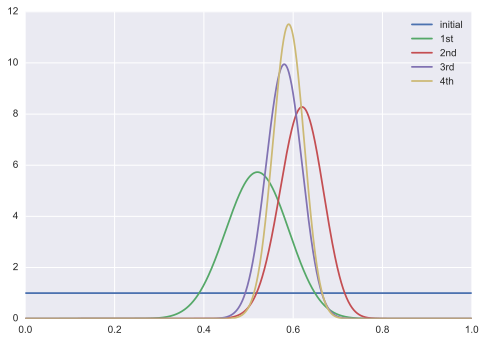

In [6]:
theta0 = 0.6
a0, b0 = 1, 1
print("step 0: mode = unknown")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), label="initial");

np.random.seed(0)
x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a1, b1 = a0 + N1, b0 + N0
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), label="1st");
print("step 1: mode =", (a1 - 1)/(a1 + b1 - 2))

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a2, b2 = a1 + N1, b1 + N0
plt.plot(xx, sp.stats.beta(a2, b2).pdf(xx), label="2nd");
print("step 2: mode =", (a2 - 1)/(a2 + b2 - 2))

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a3, b3 = a2 + N1, b2 + N0
plt.plot(xx, sp.stats.beta(a3, b3).pdf(xx), label="3rd");
print("step 3: mode =", (a3 - 1)/(a3 + b3 - 2))

x = sp.stats.bernoulli(theta0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a4, b4 = a3 + N1, b3 + N0
plt.plot(xx, sp.stats.beta(a4, b4).pdf(xx), label="4th");
print("step 4: mode =", (a4 - 1)/(a4 + b4 - 2))

plt.legend()
plt.show()

## 카테고리 분포의 모수 추정

다음으로 클래스 갯수가 $K$인 카테고리 분포의 모수 $\theta$ 벡터를 베이지안 추정법으로 추정해 본다.

카테고리 분포의 모수의 각 원소는 모두 0부터 1사이의 값을 가지므로 사전 분포는 하이퍼 모수 $\alpha_i=\dfrac{1}{K}$인 디리클리 분포로 한다.

$$ P(\theta) \propto \prod_{k=1}^K \theta_i^{\alpha_i - 1} \;\;\; (\alpha_i = 1/K , \; \text{ for all } i) $$


데이터는 모두 독립적인 카테고리 분포의 곱이므로 우도는 다음과 같이 다항 분포가 된다.

$$ p(x_{1},\ldots,x_{N} \mid \theta) = \prod_{i=1}^N  \prod_{k=1}^K \theta_k^{x_{i,k}} $$

베이지안 규칙을 사용하여 사후 분포를 구하면 다음과 같이 갱신된 하이퍼 모수 $\alpha'_i$를 가지는 디리클리 분포가 된다.

$$ 
\begin{eqnarray}
p(\theta \mid x_{1},\ldots,x_{N})
&\propto & p(x_{1},\ldots,x_{N} \mid \theta)  P(\theta) \\
&=& \prod_{i=1}^N  \prod_{k=1}^K \theta_k^{x_{i,k}} \cdot \prod_{k=1}^K \theta_i^{\alpha_i - 1}  \\
&=& \prod_{k=1}^K  \theta^{\sum_{i=1}^N x_i + \alpha_i − 1}   \\
&=& \prod_{k=1}^K  \theta^{N_i + \alpha_i −1}   \\
&=& \prod_{k=1}^K  \theta^{\alpha'_i −1}   \\
\end{eqnarray}
$$

이 경우에도 conjugated prior 임을 알 수 있다.

갱신된 하이퍼 모수의 값은 다음과 같다.
$$ \alpha'_i = N_i + \alpha_i $$



In [15]:
def plot_dirichlet(alpha):

    def project(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

    def project_reverse(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return x[:,0][:, np.newaxis] * m1 + x[:,1][:, np.newaxis] * m2 + n12

    eps = np.finfo(float).eps * 10
    X = project([[1-eps,0,0], [0,1-eps,0], [0,0,1-eps]])
    
    import matplotlib.tri as mtri

    triang = mtri.Triangulation(X[:,0], X[:,1], [[0, 1, 2]])
    refiner = mtri.UniformTriRefiner(triang)
    triang2 = refiner.refine_triangulation(subdiv=6)
    XYZ = project_reverse(np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])

    pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
    plt.tricontourf(triang2, pdf)
    plt.axis("equal")
    plt.show()

In [46]:
theta0 = np.array([0.2, 0.6, 0.2])

np.random.seed(0)
x1 = np.random.choice(3, 20, p=theta0)
N1 = np.bincount(x1, minlength=3)
x2 = np.random.choice(3, 100, p=theta0)
N2 = np.bincount(x2, minlength=3)
x3 = np.random.choice(3, 1000, p=theta0)
N3 = np.bincount(x3, minlength=3)

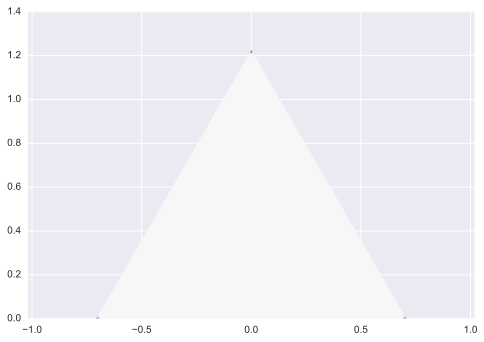

In [47]:
a0 = np.ones(3) / 3
plot_dirichlet(a0)

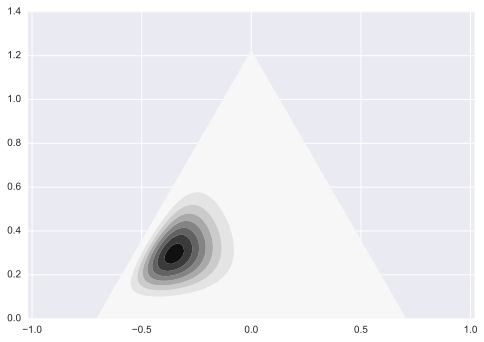

[ 0.12962963  0.62962963  0.24074074]


In [48]:
a1 = a0 + N1
plot_dirichlet(a1)
print((a1 - 1)/(a1.sum() - 3))

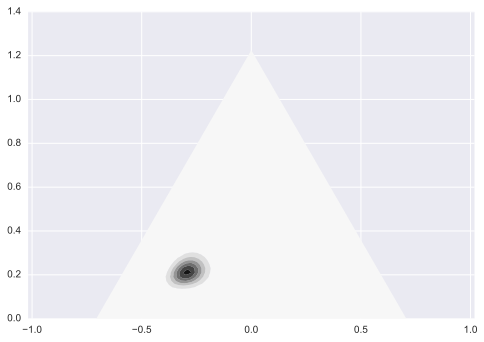

[ 0.20621469  0.62146893  0.17231638]


In [49]:
a2 = a1 + N2
plot_dirichlet(a2)
print((a2 - 1)/(a2.sum() - 3))

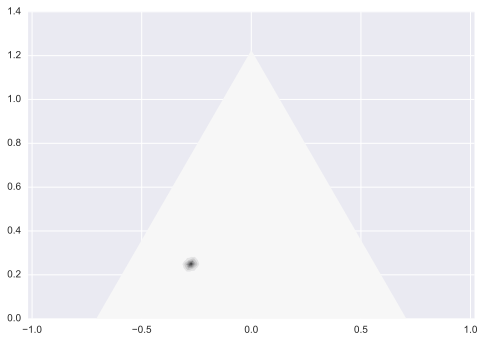

[ 0.2033393   0.59421586  0.20244484]


In [50]:
a3 = a2 + N3
plot_dirichlet(a3)
print((a3 - 1)/(a3.sum() - 3))

## 정규 분포의 기댓값 모수 추정

이번에는 정규 분포의 기댓값 모수를 베이지안 방법으로 추정한다. 분산 모수 $\sigma^2$은 알고 있다고 가정한다.

기댓값은 $-\infty$부터 $\infty$까지의 모든 수가 가능하기 때문에 모수의 사전 분포로는 정규 분포를 사용한다.

$$ P(\mu) = N(\mu_0, \sigma^2_0) = \dfrac{1}{\sqrt{2\pi\sigma_0^2}} \exp \left(-\dfrac{(\mu-\mu_0)^2}{2\sigma_0^2}\right)$$

데이터는 모두 독립적인 정규 분포의 곱이므로 우도는 다음과 같이 된다.

$$ P(x_{1},\ldots,x_{N} \mid \mu) = \prod_{i=1}^N N(x_i \mid \mu )  = \prod_{i=1}^N  \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right)  $$

$$ 
\begin{eqnarray}
P(\theta \mid x_{1},\ldots,x_{N})  
&\propto & P(x_{1},\ldots,x_{N} \mid \theta) P(\theta) \\
&\propto & \exp \left(-\dfrac{(\mu-\mu'_0)^2}{2\sigma_0^{'2}}\right) \\
\end{eqnarray}
$$

베이지안 규칙을 사용하여 사후 분포를 구하면 다음과 같이 갱신된 하이퍼 모수  를 가지는 정규 분포가 된다.

$$
\begin{eqnarray}
\mu'_0 &=& \dfrac{\sigma^2}{N\sigma_0^2 + \sigma^2}\mu_0 + \dfrac{N\sigma_0^2}{N\sigma_0^2 + \sigma^2} \dfrac{\sum x_i}{N} \\
\dfrac{1}{\sigma_0^{'2}} &=& \dfrac{1}{\sigma_0^{2}} + \dfrac{N}{\sigma^{'2}}
\end{eqnarray}
$$


1.95573083623
2.15546157111
1.87567401511
2.04777201998


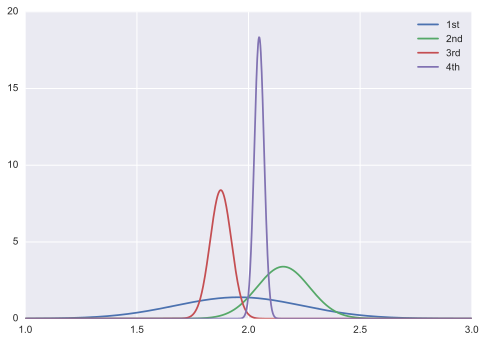

In [105]:
mu, sigma2 = 2, 4

mu0, sigma20 = 0, 1
xx = np.linspace(1, 3, 1000)

np.random.seed(0)

N = 10
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="1st");
print(mu0)

N = 20
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="2nd");
print(mu0)

N = 50
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="3rd");
print(mu0)

N = 100
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="4th");
print(mu0)

plt.axis([1, 3, 0, 20])
plt.legend()
plt.show()